### Automation Script Overhaul 
For automating the parsing, transformation, and geographic file creation from .GPX
Work taken from the script by Isias (ler_gpx.py) and workflow by Simone. Further developments by Kyle & Isais.

### Section 1
This section takes the raw GPX files and makes them analysis ready for QGIS and statistical analysis.

In [30]:
#import dependiencies
import gpxpy
import pandas as pd
import geopandas as gpd
from glob import glob

gpxFiles = glob('*.gpx')
print(gpxFiles)

['ler.gpx', '20220607.gpx']


In [64]:
#Choose which file (or all in directory) to use
gpxCurrent = gpxFiles[1] #select (using 0-n) the gpx file to manipulate
gpxCurrent = open(gpxCurrent)
gpxCurrent = gpxpy.parse(gpxCurrent)
gpxCurrent = gpxCurrent.to_xml()
df = pd.read_xml(gpxCurrent)
df.pop('desc')
df.pop('hdop')
df.pop('time')
df = df.drop(index=0)
shiftPos = df.pop('name')
df.insert(0, 'name', shiftPos)
df.head()

,name,lat,lon,ele
1,2022-06-07 13:46:24j22,-7.517397,-34.967164,89.0
2,2022-06-07 13:49:07m4,-7.517351,-34.967194,89.0
3,2022-06-07 13:50:24j13,-7.517413,-34.967114,89.0
4,2022-06-07 13:53:31m4,-7.517787,-34.967158,84.0
5,2022-06-07 13:54:10m4,-7.517740,-34.967198,84.0


In [65]:
# Convert to geodataframe for geographic use
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat))

gdf.head()

,name,lat,lon,ele,geometry
1,2022-06-07 13:46:24j22,-7.517397,-34.967164,89.0,POINT (-34.96716 -7.51740)
2,2022-06-07 13:49:07m4,-7.517351,-34.967194,89.0,POINT (-34.96719 -7.51735)
3,2022-06-07 13:50:24j13,-7.517413,-34.967114,89.0,POINT (-34.96711 -7.51741)
4,2022-06-07 13:53:31m4,-7.517787,-34.967158,84.0,POINT (-34.96716 -7.51779)
5,2022-06-07 13:54:10m4,-7.517740,-34.967198,84.0,POINT (-34.96720 -7.51774)


In [ ]:
# Ask for observer, group, climate conditions


In [ ]:
# Split 'name' into Time, Age/Sex, Strata Position, and Behaviour


In [ ]:
# Attempt to detect each scan, else create column for scan number


In [63]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 66 entries, 1 to 66
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   lat       66 non-null     float64 
 1   lon       66 non-null     float64 
 2   ele       66 non-null     float64 
 3   name      66 non-null     object  
 4   geometry  66 non-null     geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 2.7+ KB


### Section 2

<AxesSubplot:>

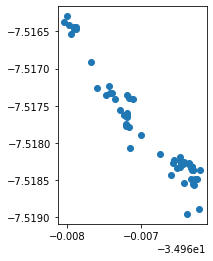

In [66]:
gdf.plot()